## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">BIKE DEMAND VISUALIZATION PROJECT</p>

![image.jpg](https://i.ibb.co/c2rq4rT/Bike-Sharing.png)

[Photo Credit: Thinking Neuron](https://thinkingneuron.com/bike-rental-demand-prediction-case-study-in-python/)

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">ABOUT THE DATASET & CONTEXT</p>

Welcome to **"Bike Demand Visualization Project"** free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">ABOUT THE FEATURES</p>

<a id="00"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**- ``timestamp``** - timestamp field for grouping the data<br>
**- ``cnt``** - the count of a new bike shares<br>
**- ``t1``** - real temperature in C<br>
**- ``t2``** - temperature in C “feels like”<br>
**- ``hum``** - humidity in percentage<br>
**- ``wind_speed``** - wind speed in km/h<br>
**- ``weather_code``** - category of the weather<br>
**- ``is_holiday``** - boolean field - 1 holiday / 0 non holiday<br>
**- ``is_weekend``** - boolean field - 1 if the day is weekend<br>
**- ``season``** - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.<br>

**"weather_code" category description:**<br>
**``1``** = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity<br> 
**``2``** = scattered clouds / few clouds<br> 
**``3``** = Broken clouds<br> 
**``4``** = Cloudy<br> 
**``7``** = Rain/ light Rain shower/ Light rain<br> 
**``10``** = rain with thunderstorm<br> 
**``26``** = snowfall<br> 
**``94``** = Freezing Fog<br>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK</p>

<a id="000"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
# pd.set_option('display.max_columns', None)

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">READING THE DATASET</p>


**Now Let us first try to load and read the store_sharing dataset. [SOURCE](https://towardsdatascience.com/learn-how-to-read-data-into-a-pandas-dataframe-in-5-minutes-122af8e0b9db) for learning how to read data into a Pandas DataFrame in 5 minutes.** 

In [52]:
df = pd.read_csv("store_sharing.csv")

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT</p>

In [53]:
pd.concat([df.head(3), df.sample(3), df.tail(3)])

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
11118,2016-04-14 03:00:00,37,10.5,9.5,74.0,11.0,1.0,0.0,0.0,0.0
14142,2016-08-19 01:00:00,241,17.0,17.0,88.0,7.0,1.0,0.0,0.0,1.0
9503,2016-02-05 20:00:00,687,11.0,11.0,77.0,29.5,7.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [55]:
df.isnull().sum().sum()

0

In [56]:
df.duplicated().sum()

0

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [58]:
for i in df.columns:
    print(i)
    print("\n")
    print(df[i].value_counts())
    print("\n")
    print("----------------")

timestamp


2015-01-04 00:00:00    1
2016-05-04 12:00:00    1
2016-05-04 18:00:00    1
2016-05-04 17:00:00    1
2016-05-04 16:00:00    1
                      ..
2015-09-03 17:00:00    1
2015-09-03 18:00:00    1
2015-09-03 19:00:00    1
2015-09-03 20:00:00    1
2017-01-03 23:00:00    1
Name: timestamp, Length: 17414, dtype: int64


----------------
cnt


46      46
53      39
33      36
70      36
120     36
        ..
3022     1
3112     1
1338     1
3270     1
2220     1
Name: cnt, Length: 3781, dtype: int64


----------------
t1


 13.000000    969
 12.000000    822
 9.000000     807
 14.000000    802
 11.000000    779
             ... 
 31.500000      3
 31.000000      3
 34.000000      2
-1.500000       1
 10.333333      1
Name: t1, Length: 73, dtype: int64


----------------
t2


 13.000000    969
 12.000000    821
 14.000000    802
 11.000000    774
 16.000000    729
             ... 
 33.000000      2
-5.500000       1
-5.000000       1
-6.000000       1
 10.333333      1
Name:

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON-HOLIDAY-WEEKEND-WEATHERCODE</p>

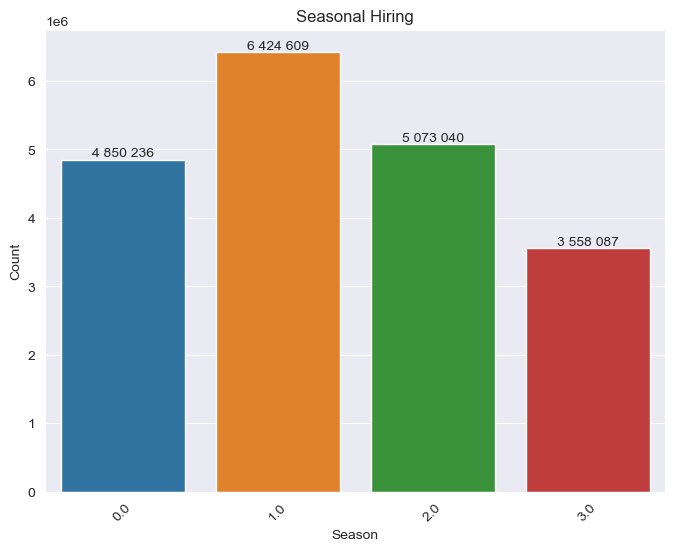

In [59]:
fig, ax = plt.subplots(figsize = (8, 6))
g = sns.barplot(data = df, x = "season", y = "cnt", estimator = sum, ci = False);
plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Seasonal Hiring")
for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:6,.0f}'.format(p.get_height()).replace(',', ' ')
    ax.text(_x, _y, value, ha="center", va = "bottom")

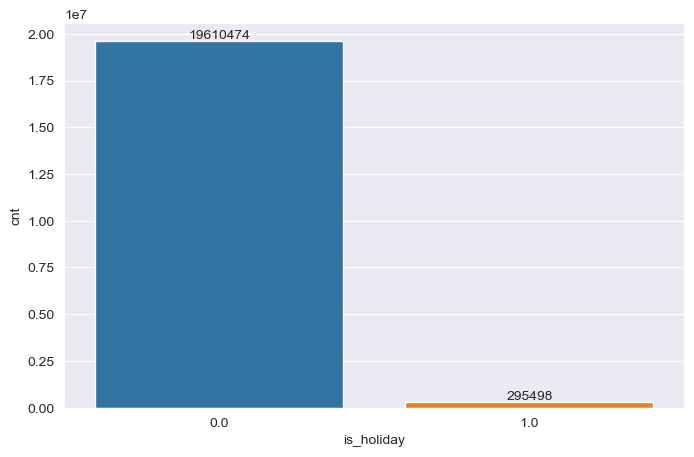

In [60]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data = df, x = "is_holiday", y = "cnt", estimator = sum, ci = False)
ax.bar_label(ax.containers[0], fmt='%d');

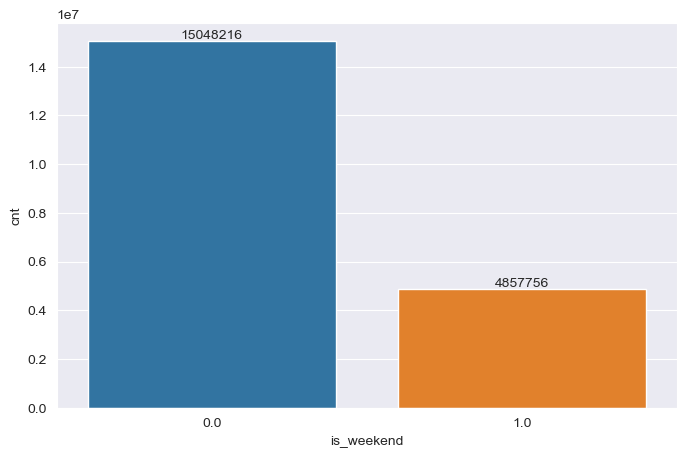

In [61]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data = df, x = "is_weekend", y = "cnt", estimator = sum, ci = False)
ax.bar_label(ax.containers[0], fmt='%d');

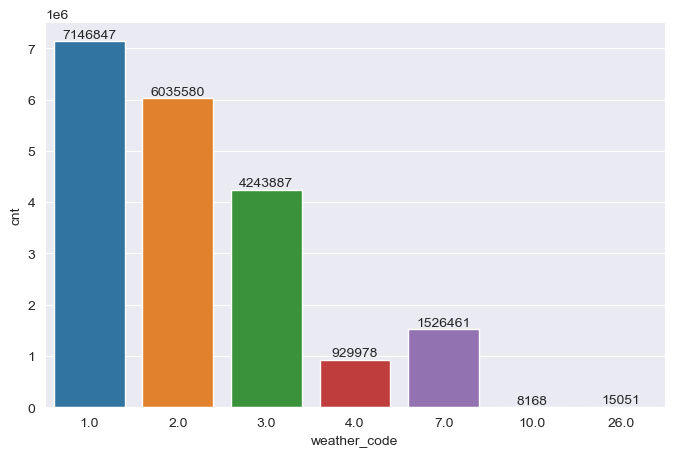

In [62]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data = df, x = "weather_code", y = "cnt", estimator = sum, ci = False)
ax.bar_label(ax.containers[0], fmt='%d');

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM ``TIMESTAMP`` IN TYPE & SET IT AS INDEX</p>

In [63]:
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace = True)
df.head(1)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0


### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.</p>

In [64]:
f = lambda x: x.strftime('%Y-%m')
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.month
df['day_of_month'] = df.index.day
df["day_of_week"] = df.index.dayofweek
df["year_month"] = f(df.index)
df['hour'] = df.index.hour
df.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,day_of_month,day_of_week,year_month,hour
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,1,4,6,2015-01,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,1,4,6,2015-01,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,1,4,6,2015-01,2


In [65]:
df['name_of_day'] = df.index.day_name()
df['name_of_day'].value_counts()

Monday       2508
Sunday       2505
Tuesday      2505
Thursday     2492
Wednesday    2489
Saturday     2465
Friday       2450
Name: name_of_day, dtype: int64

In [66]:
days = {0:1,1:2,2:3,3:4,4:5,5:6,6:7}
df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])
df.day_of_week.value_counts().sort_index()

1    2508
2    2505
3    2489
4    2492
5    2450
6    2465
7    2505
Name: day_of_week, dtype: int64

In [67]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,day_of_month,day_of_week,year_month,hour,name_of_day
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,1,4,7,2015-01,0,Sunday
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,1,4,7,2015-01,1,Sunday
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,1,4,7,2015-01,2,Sunday
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,1,4,7,2015-01,3,Sunday
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,1,4,7,2015-01,4,Sunday


### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">VISUALIZING THE CORRELATION WITH A HEATMAP</p>

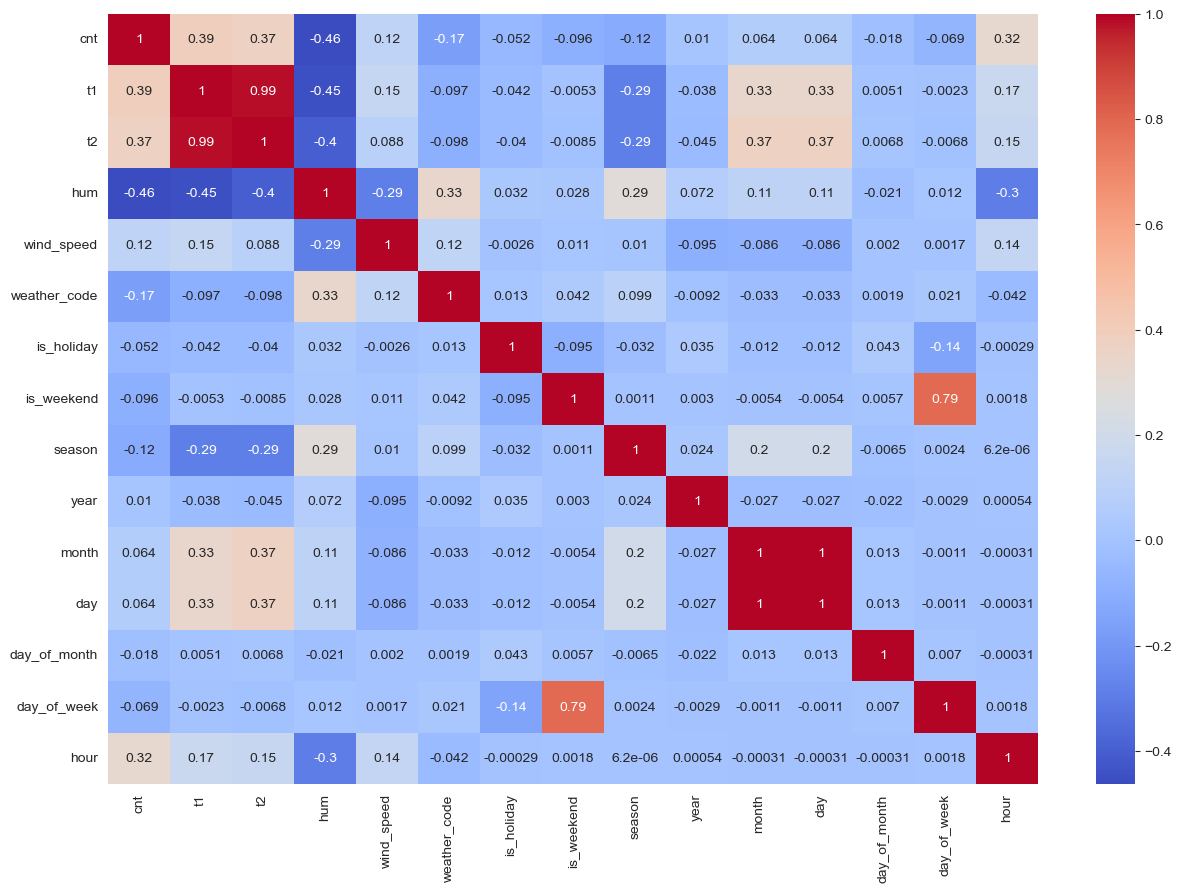

In [68]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

In [69]:
cnt_corr = df.corr()[["cnt"]].sort_values(by = "cnt", ascending=False)[1:]
cnt_corr

,cnt
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
day,0.063757
year,0.010046
day_of_month,-0.017887
is_holiday,-0.051698
day_of_week,-0.068688


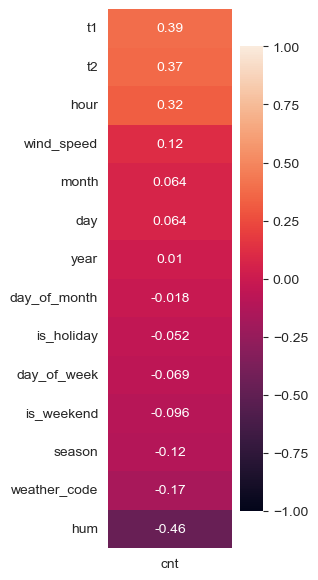

In [70]:
plt.figure(figsize=(2, 7))
sns.heatmap(cnt_corr, vmin=-1, vmax=1, annot=True);

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLOT</p>

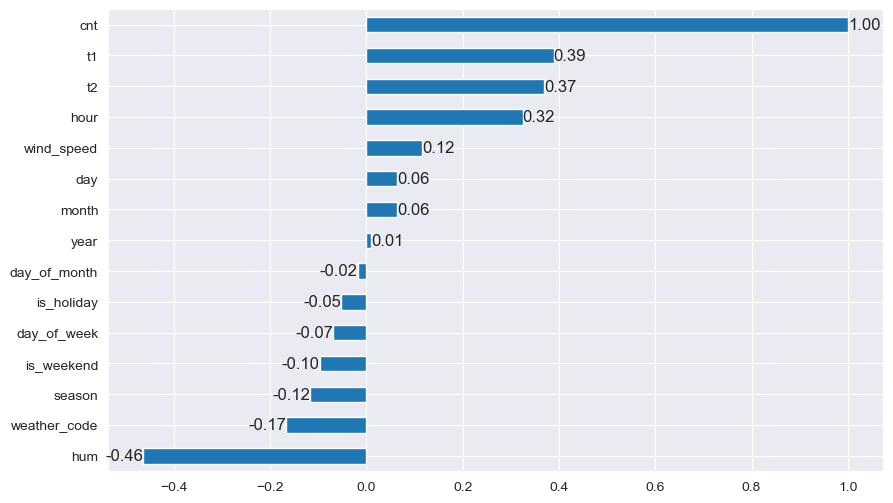

In [71]:
plt.figure(figsize=(10, 6))
ax = df.corr()["cnt"].sort_values().plot.barh()
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12)

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT</p>

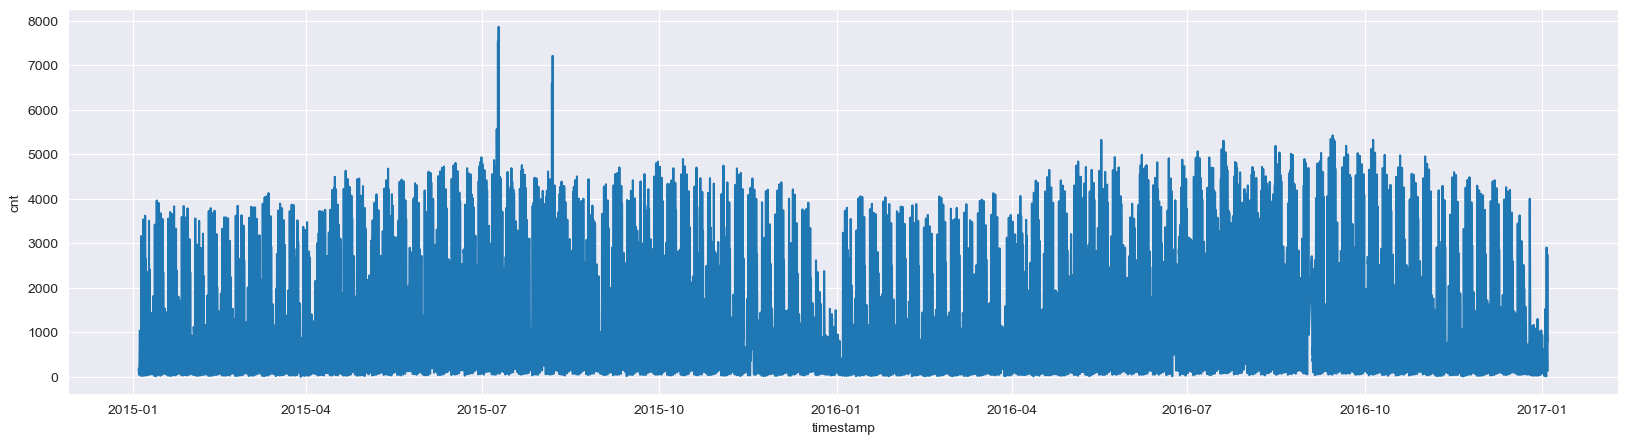

In [72]:
plt.figure(figsize=(20, 5))
sns.lineplot(x=df.index, y='cnt', data=df)
plt.show()

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)</p>

In [73]:
df_sum = pd.DataFrame(df.groupby('year_month').cnt.sum())
df_sum

,cnt
year_month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


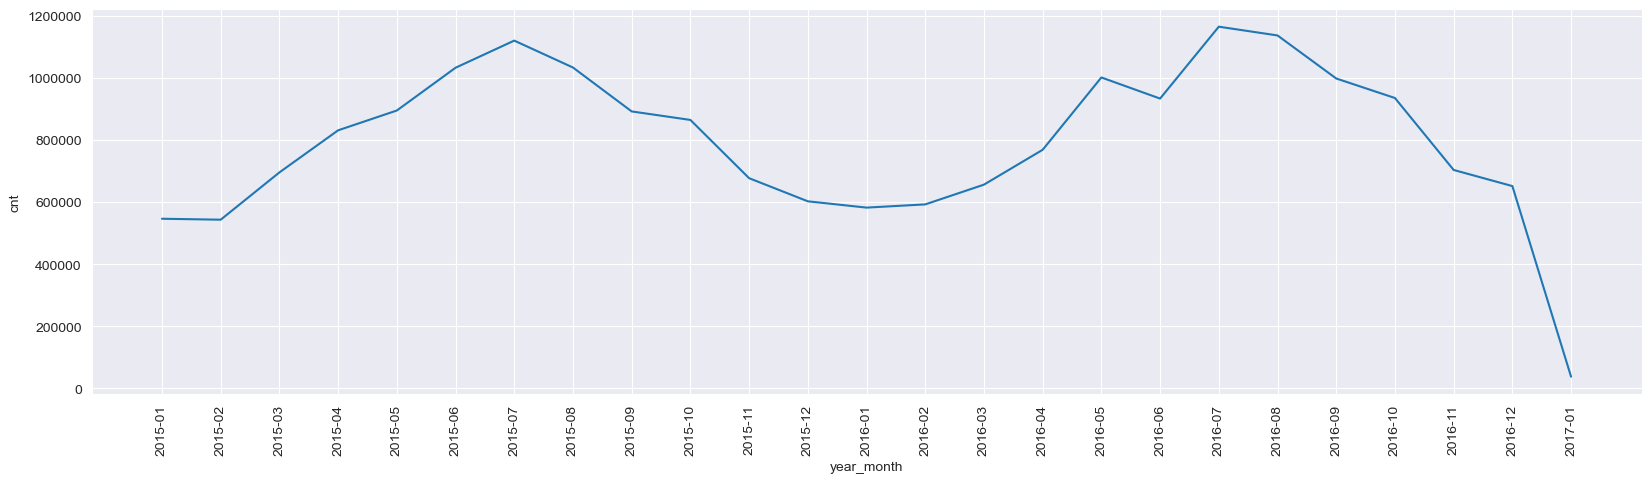

In [74]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='year_month', y='cnt', data=df_sum)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90);

In [75]:
df.groupby("month")["cnt"].mean()

month
1      784.691997
2      836.279617
3      921.294959
4     1112.953408
5     1275.099462
6     1383.354430
7     1543.696151
8     1463.116577
9     1356.597561
10    1217.546991
11     965.867832
12     845.516173
Name: cnt, dtype: float64

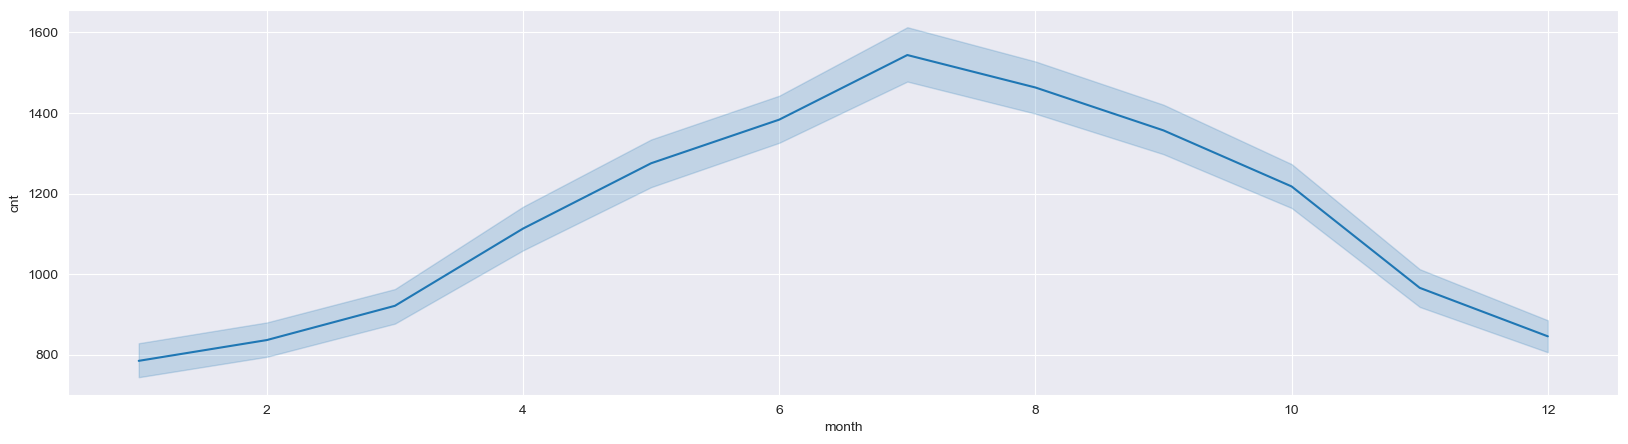

In [76]:
plt.figure(figsize = (20,5))
sns.lineplot(x='month', y='cnt', data=df);

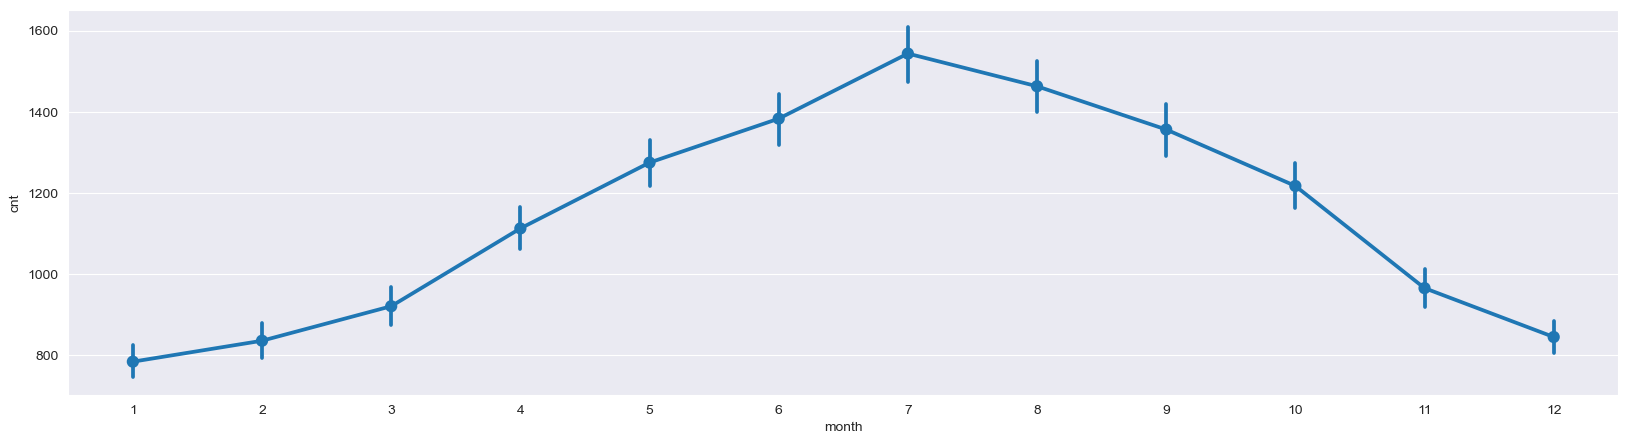

In [77]:
plt.figure(figsize = (20,5))
sns.pointplot(x="month", y ="cnt", data=df);

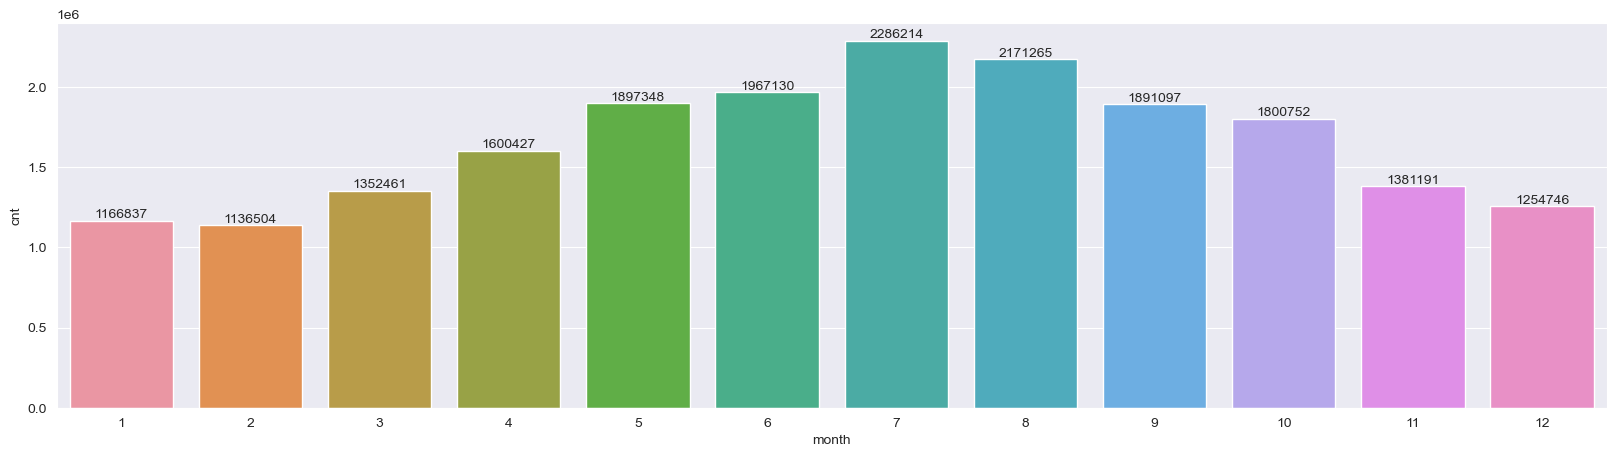

In [78]:
plt.figure(figsize = (20,5))
chart = sns.barplot(x="month", y="cnt", data=df, estimator=sum, ci=None)
chart.bar_label(chart.containers[0], fmt='%d');

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)</p>

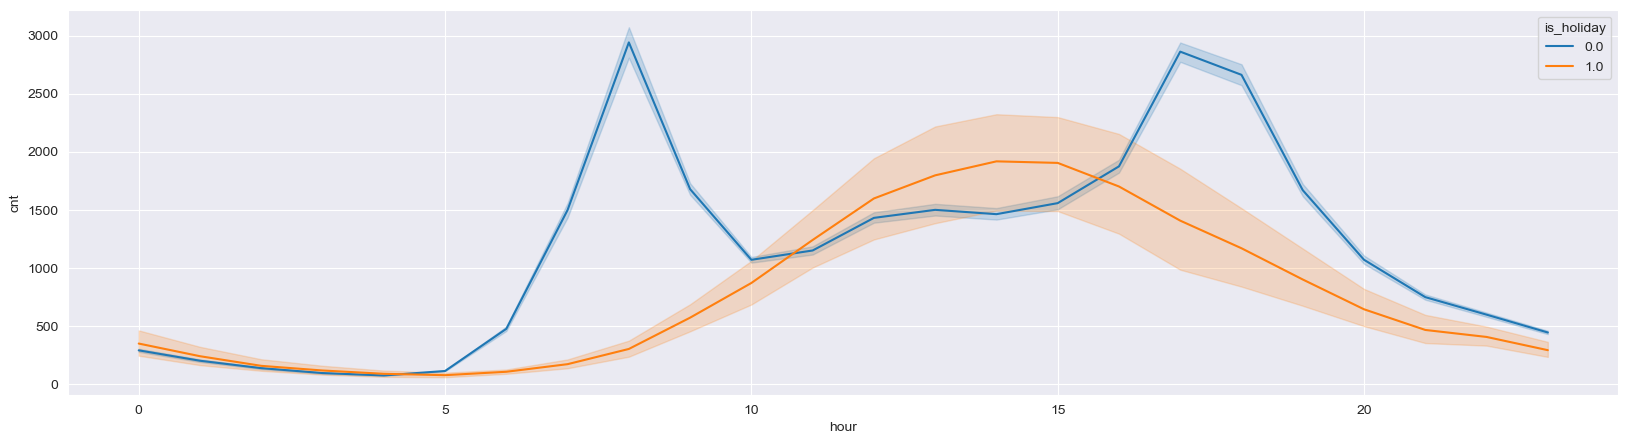

In [79]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='hour', y='cnt', data=df, hue='is_holiday');

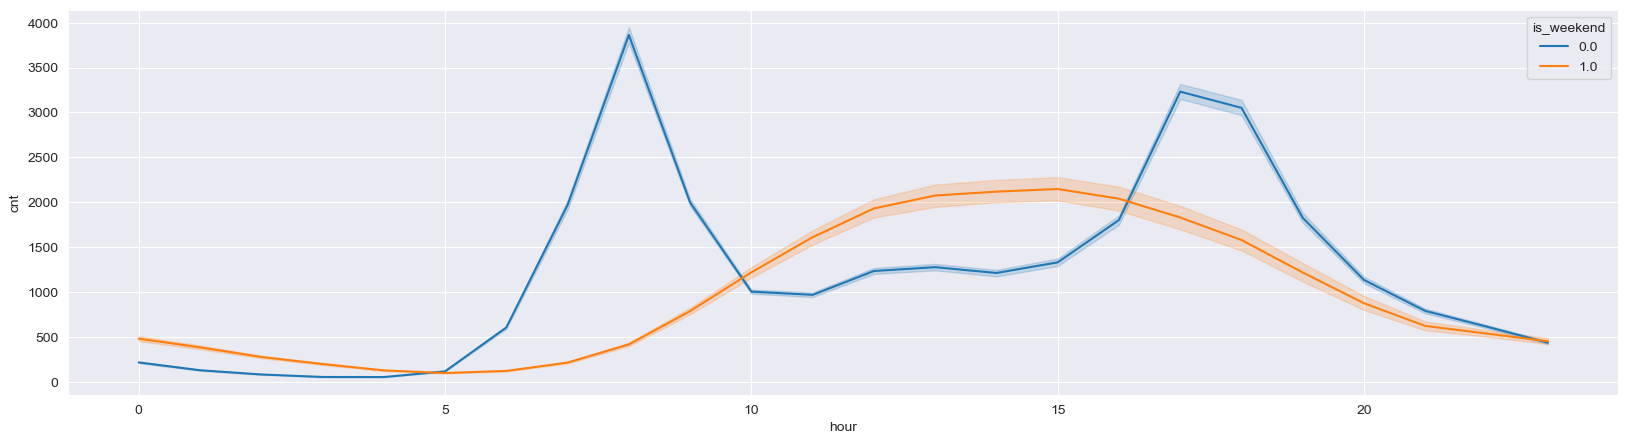

In [80]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='hour', y='cnt', data=df, hue='is_weekend');

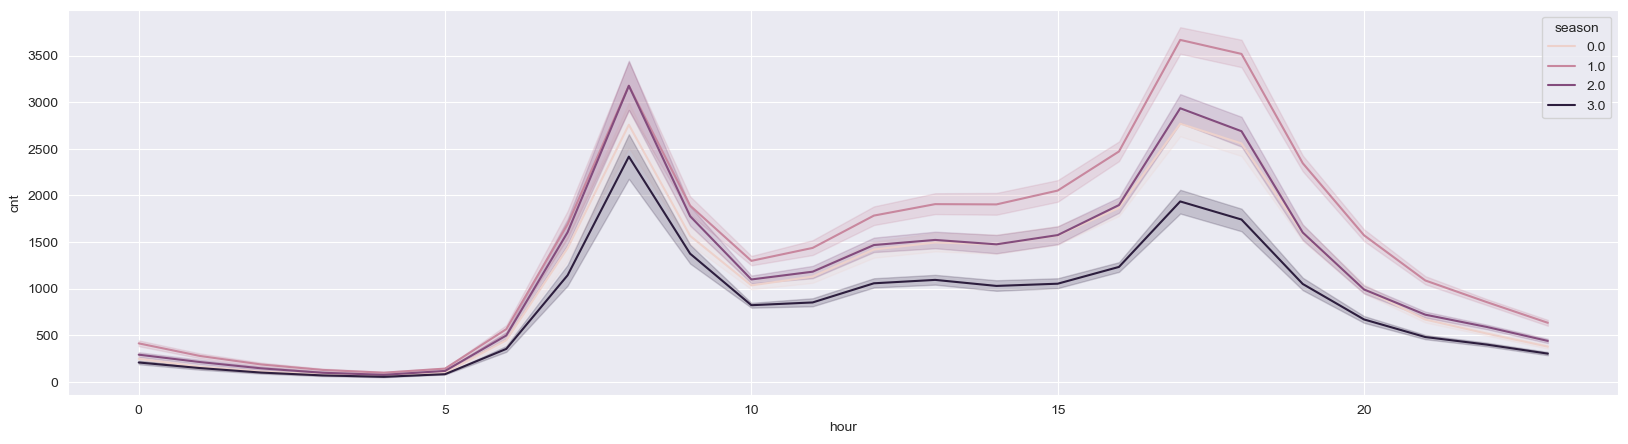

In [81]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='hour', y='cnt', data=df, hue='season');

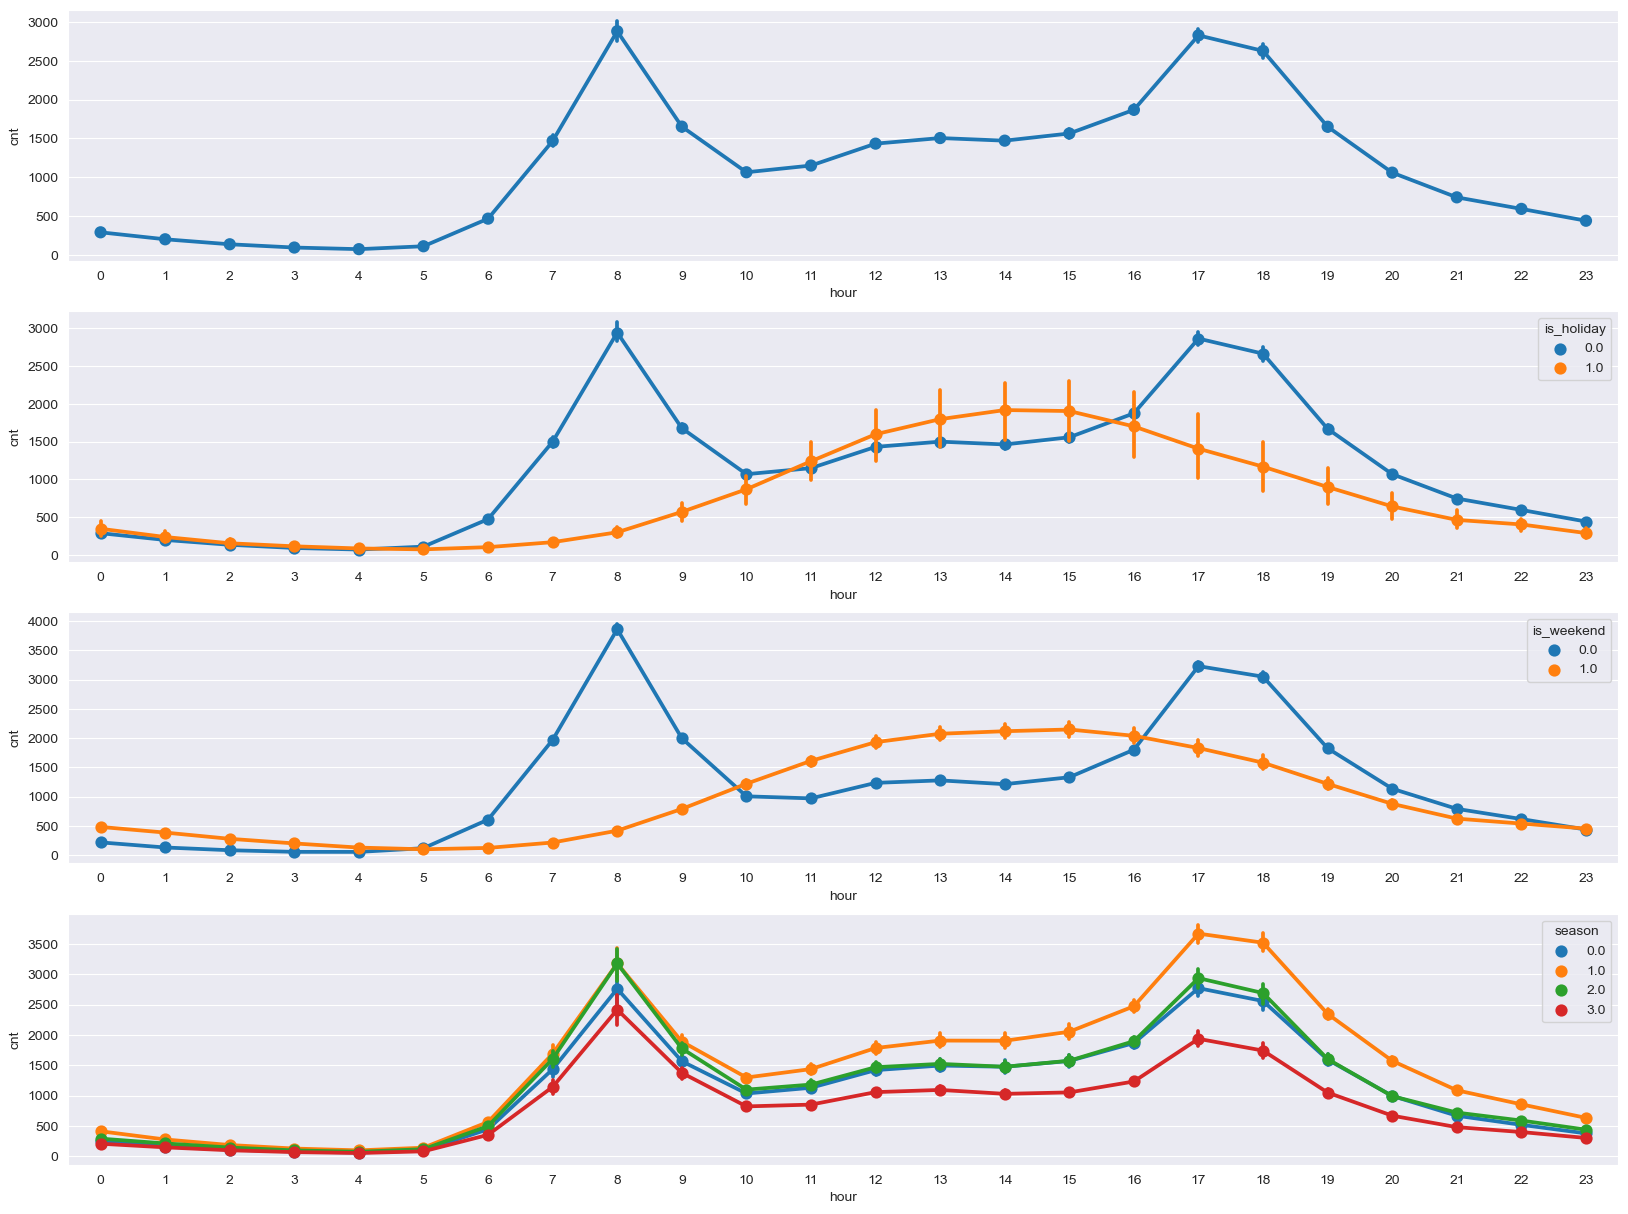

In [82]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(20, 15))

sns.pointplot(data=df, x='hour', y='cnt', ax=ax1)
sns.pointplot(data=df, x='hour', y='cnt', hue='is_holiday', ax=ax2)
sns.pointplot(data=df, x='hour', y='cnt', hue='is_weekend', ax=ax3)
sns.pointplot(data=df, x='hour', y='cnt', hue='season', ax=ax4);

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PLOTTING BIKE SHARES BY DAY OF WEEK</p>

- You may want to see whether it is a holiday or not

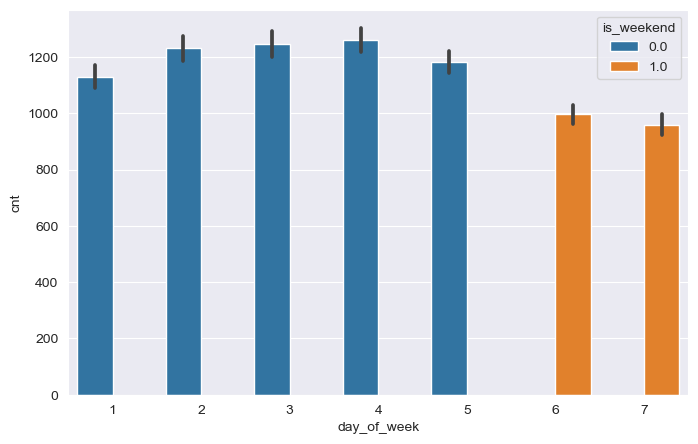

In [83]:
plt.figure(figsize=(8,5))
sns.barplot(x="day_of_week", y="cnt", data=df, hue='is_weekend');

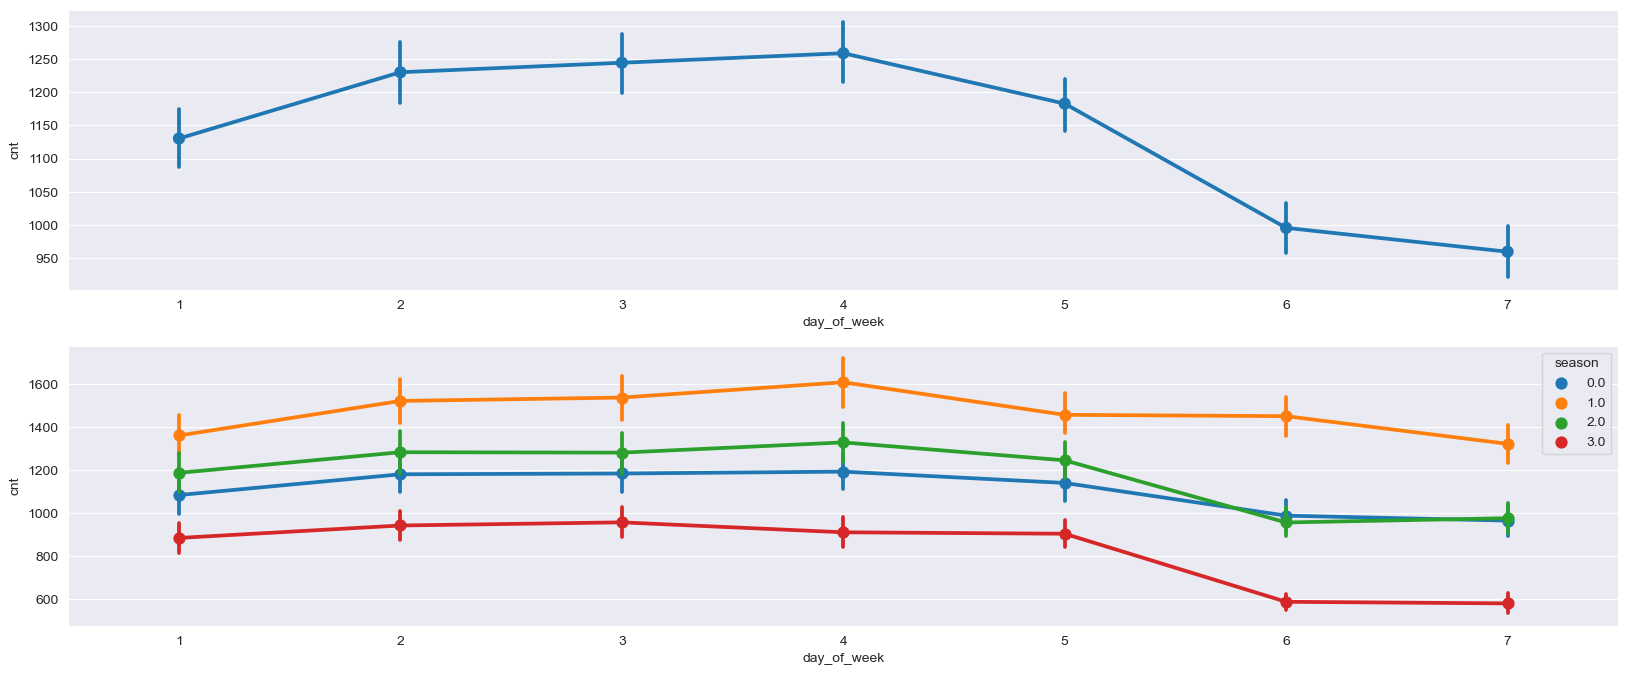

In [84]:
fig, (ax1, ax2) = plt.subplots(nrows=2) # figzise=(15, 8)
fig.set_size_inches(20, 8)  

sns.pointplot(data=df, x='day_of_week', y='cnt', ax=ax1)
sns.pointplot(x="day_of_week", y="cnt", data=df, hue="season", ax=ax2);

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PLOTTING BIKE SHARES BY DAY OF MONTH</p>

In [85]:
df.groupby('day_of_month').cnt.mean().apply(lambda x: round(x))

day_of_month
1     1077
2     1088
3     1128
4     1144
5     1141
6     1211
7     1194
8     1223
9     1261
10    1157
11    1204
12    1167
13    1139
14    1124
15    1176
16    1141
17    1182
18    1179
19    1153
20    1116
21    1126
22    1128
23    1174
24    1054
25    1191
26    1082
27    1131
28    1063
29    1080
30    1156
31     968
Name: cnt, dtype: int64

In [86]:
dom = pd.DataFrame(df.groupby('day_of_month').cnt.mean().apply(lambda x: round(x))).rename_axis('dom')
dom.T

dom,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,...,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


dom,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,...,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


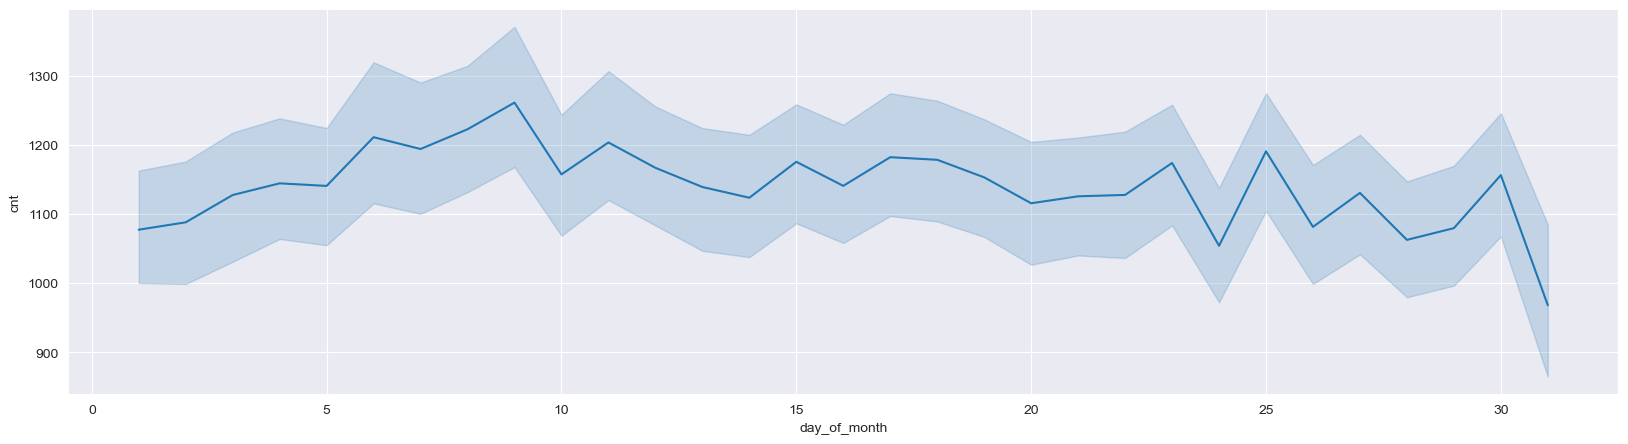

In [87]:
plt.figure(figsize=(20, 5))

ax = sns.lineplot(x='day_of_month', y='cnt', data=df)
pd.DataFrame(df.groupby('day_of_month').cnt.mean().apply(lambda x: round(x))).rename_axis('dom').T

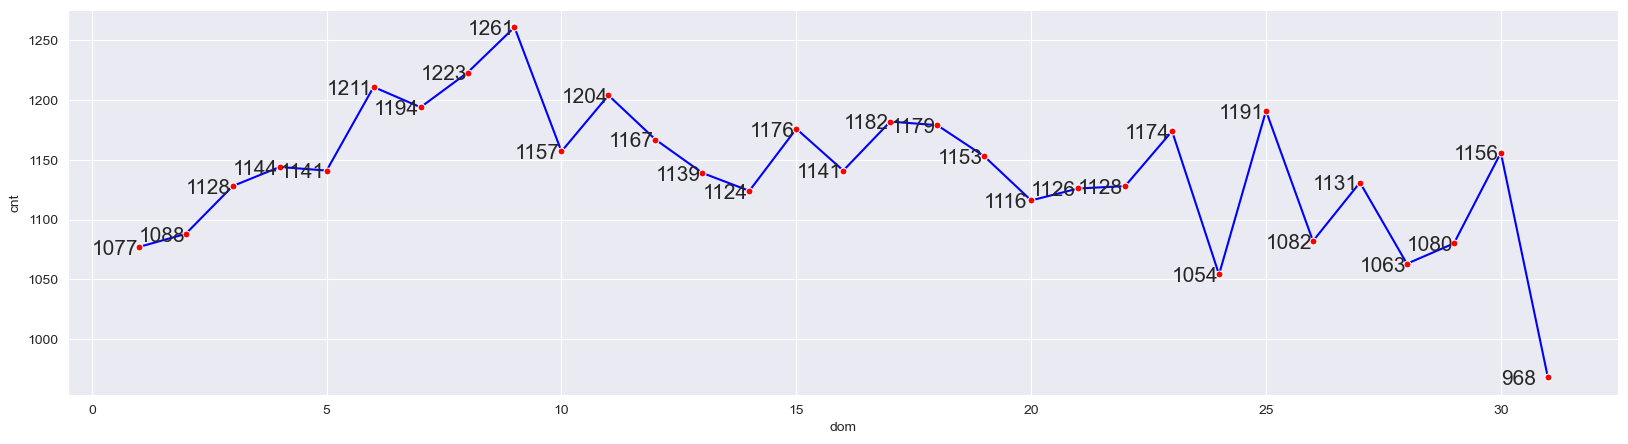

In [88]:
plt.figure(figsize=(20, 5))

ax = sns.lineplot(dom.index, dom["cnt"], color='blue', linestyle='-', marker='o', markerfacecolor='red', markersize=5)

for index, value  in enumerate(dom.cnt.values):
    plt.text(index,value,str(value), va = "center_baseline", ha = "left", fontsize=15)

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON</p>

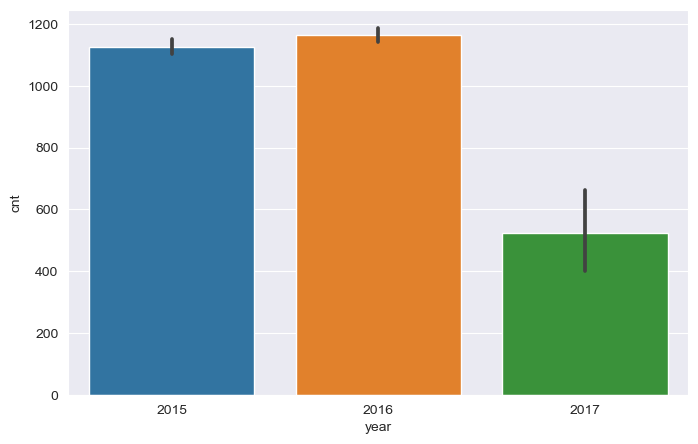

In [89]:
plt.figure(figsize=(8,5))
sns.barplot(x="year", y="cnt", data=df);

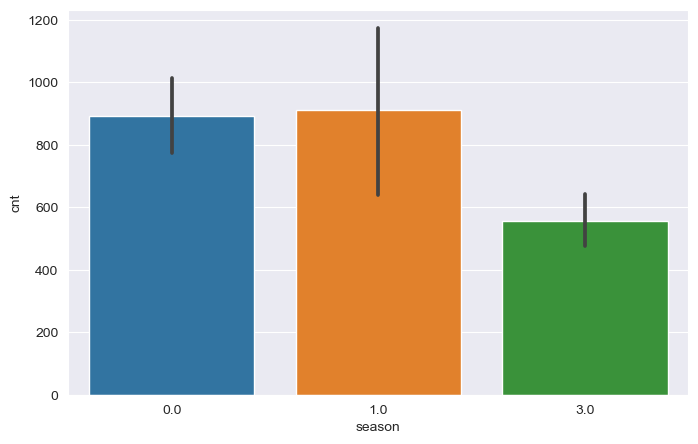

In [90]:
plt.figure(figsize=(8,5))
sns.barplot(x="season", y="cnt", data=df[df["is_holiday"]==1]);

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT</p>

In [91]:
round(df['is_weekend'].value_counts(normalize=True)*100, 1)

0.0    71.5
1.0    28.5
Name: is_weekend, dtype: float64

In [92]:
df.is_weekend.value_counts().values

array([12444,  4970], dtype=int64)

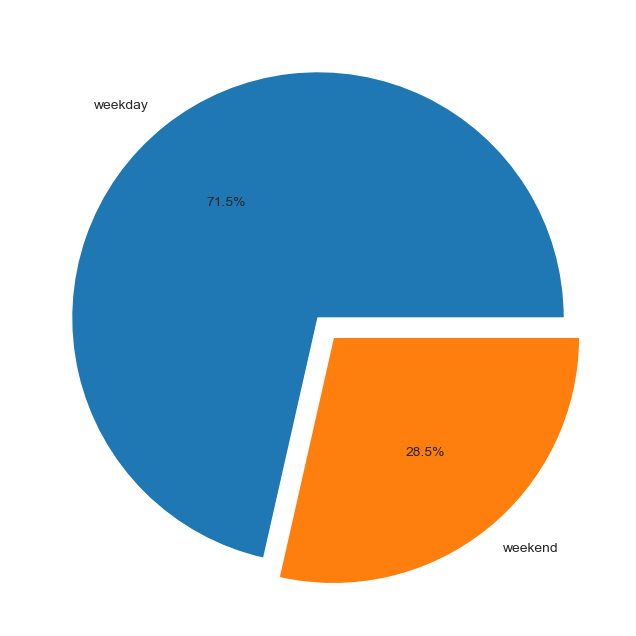

In [93]:
fig, ax = plt.subplots(figsize=(8, 8))

explode=(0, 0.1)

ax.pie(x=df.is_weekend.value_counts().values, 
       labels=['weekday', 'weekend'], 
       autopct='%.1f%%',
       explode=explode
       )

plt.show()

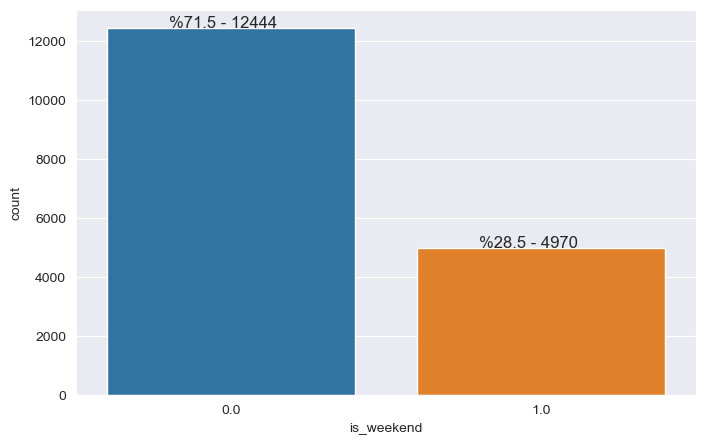

In [94]:
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.countplot(x='is_weekend',data=df)

for bar in ax.patches: 
        ax.annotate("%" + str(round(100*bar.get_height()/len(df), 1)) + ' - ' + str(bar.get_height() ), 
                    (bar.get_x()+0.2 , bar.get_height()+10),
                    size=12)

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON</p>

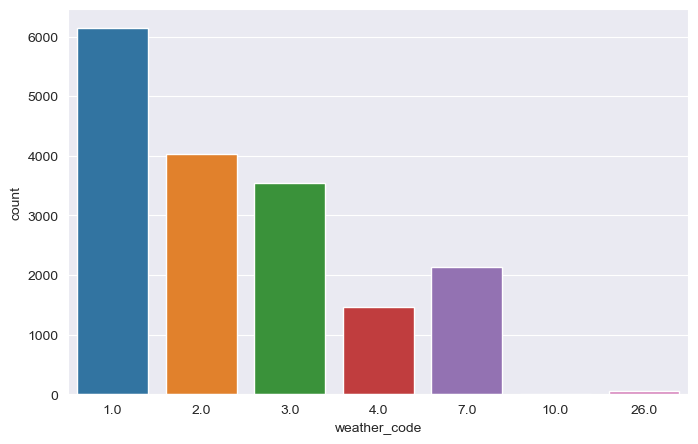

In [95]:
plt.figure(figsize=(8,5))
sns.countplot(x="weather_code", data=df);

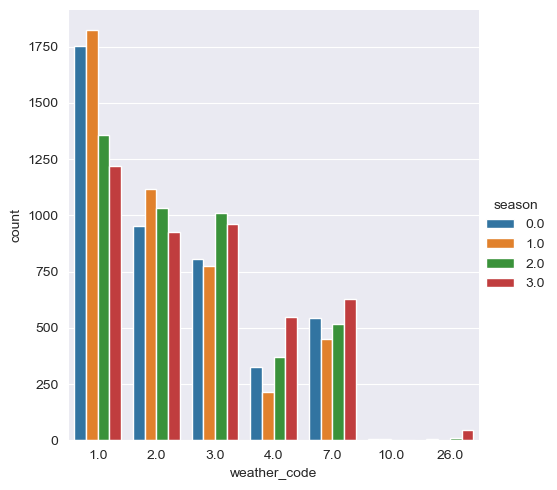

In [96]:
sns.catplot(x="weather_code", hue="season", data=df, kind='count');

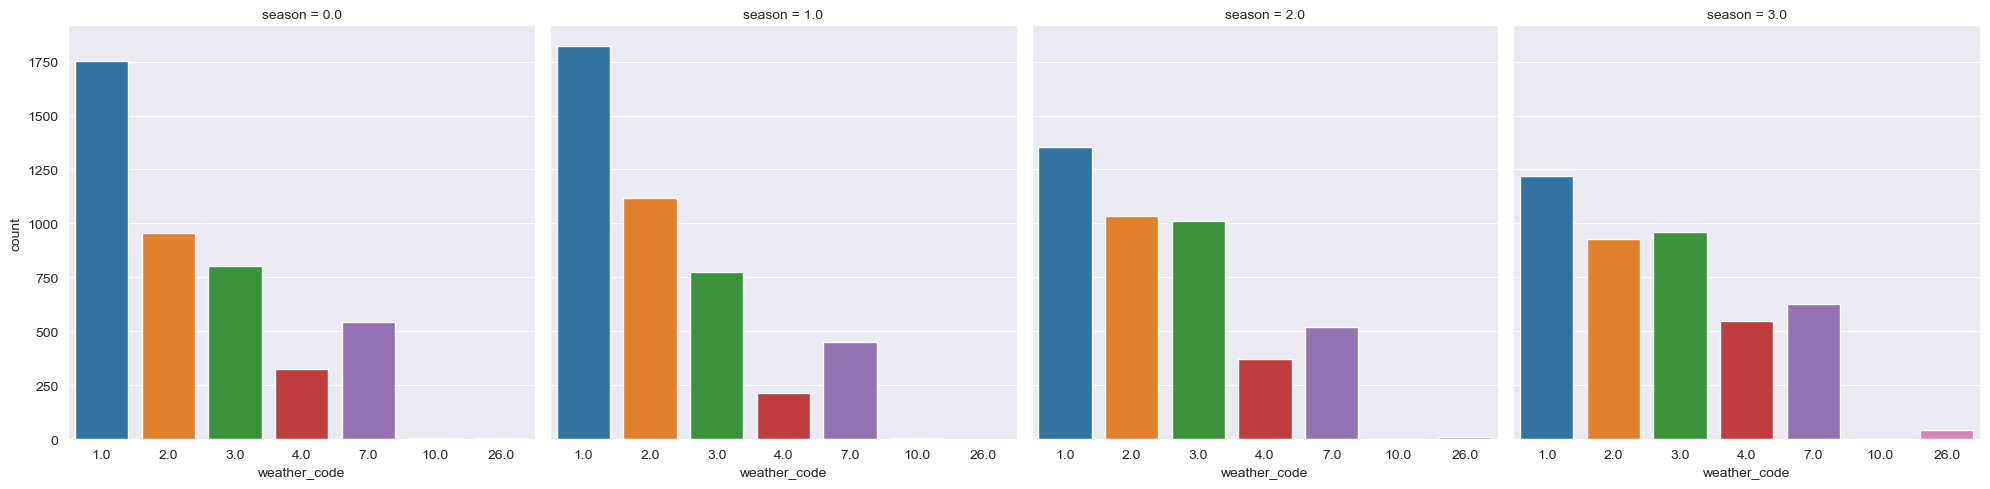

In [97]:
g = sns.catplot(x="weather_code", col="season", data=df, kind='count');

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PLOTTING BIKE SHARES OVER TIME BY USING PIVOT TABLE</p>

In [98]:
df.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,day_of_month,day_of_week,year_month,hour,name_of_day
timestamp,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,1,4,7,2015-01,0,Sunday
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,1,4,7,2015-01,1,Sunday
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,1,4,7,2015-01,2,Sunday


In [99]:
df_pivot = df.pivot_table(index="year", columns="month", values="cnt")
df_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,814.663189,810.125186,941.723951,1156.581363,1203.512097,1441.076709,1514.441892,1389.719086,1255.243319,1175.334239,952.646976,814.645946
2016,782.954301,861.787791,900.585734,1069.325452,1346.686828,1324.649645,1572.910931,1536.910811,1462.106881,1259.362046,978.941586,876.220430
2017,523.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


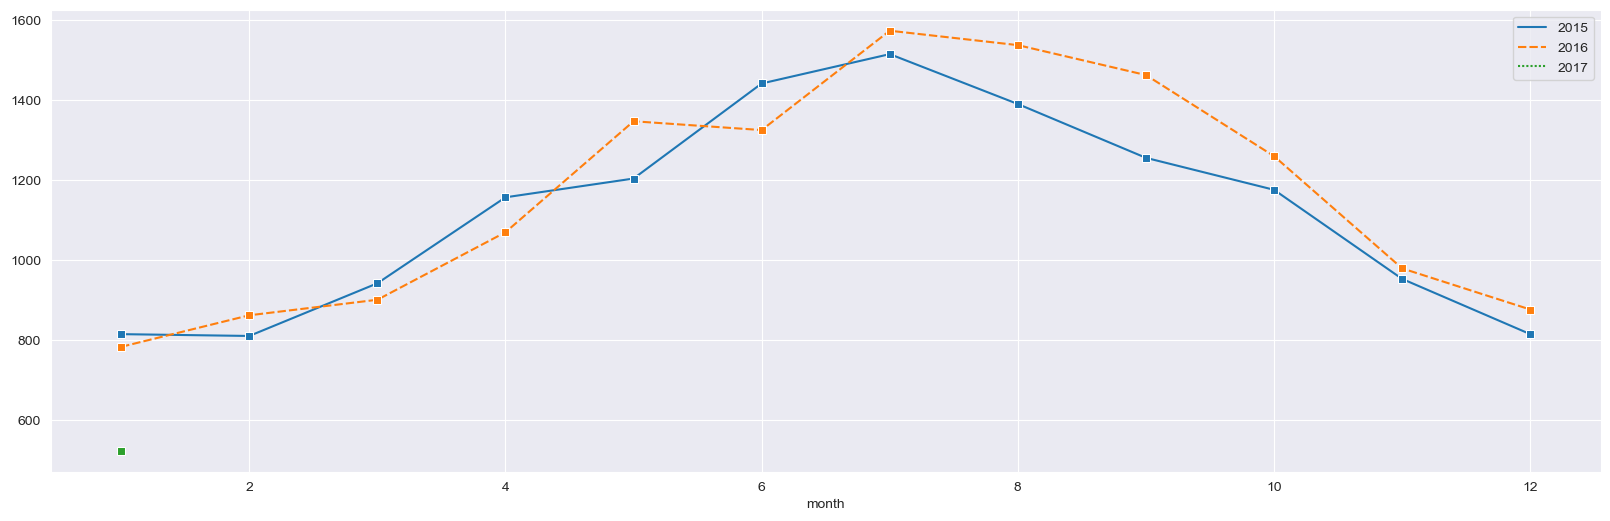

In [100]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=df_pivot.T, marker="s")
plt.legend(loc=1);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">END OF PROJECT</p>